In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
warnings.filterwarnings('ignore')
import graphviz
from IPython.display import Image  
from subprocess import call
from sklearn.metrics import accuracy_score
!pip install pydotplus
import pydotplus
from six import StringIO

In [120]:
train_path = '/kaggle/input/2023-tragedi-titanic/train.csv'
test_path = '/kaggle/input/2023-tragedi-titanic/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [121]:
train.head()


,ID,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,401,3,0,male,NaN,0,0,8.0500,NaN,S,NaN,NaN,NaN
1,402,3,1,female,22.0,1,0,13.9000,NaN,S,16,NaN,"West Haven, CT"
2,403,3,0,male,NaN,0,0,7.3125,NaN,S,NaN,NaN,NaN
3,404,3,0,male,28.0,2,0,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"
4,405,3,0,male,NaN,0,0,6.8583,NaN,Q,NaN,NaN,NaN


In [122]:
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,45.0,0,1,63.3583,D10 D12,C,7,NaN,"New York, NY"
1,2,3,male,51.0,0,0,7.7500,NaN,S,NaN,NaN,NaN
2,3,2,female,28.0,1,0,24.0000,NaN,C,10,NaN,"Russia New York, NY"
3,4,3,female,NaN,1,0,24.1500,NaN,Q,16,NaN,NaN
4,5,3,male,NaN,0,0,7.7500,NaN,Q,NaN,NaN,NaN


In [123]:
train.isnull().sum()


ID             0
pclass         0
survived       0
sex            0
age          192
sibsp          0
parch          0
fare           1
cabin        699
embarked       2
boat         583
body         820
home.dest    393
dtype: int64

In [124]:
test.isnull().sum()

ID             0
pclass         0
sex            0
age           71
sibsp          0
parch          0
fare           0
cabin        315
embarked       0
boat         240
body         368
home.dest    171
dtype: int64

In [125]:
# Fill null in Age Train
x = train['age'].dropna()
hist, bins = np.histogram(x, bins=15)

bin_centers = 0.5 * (bins[:len(bins) - 1] + bins[1:])
probabilities = hist/hist.sum()

# dictionary with random numbers from existing age distribution
train['age_rand'] = train['age'].apply(lambda v: np.random.choice(bin_centers, p=probabilities))
age_null_list = train[train['age'].isnull()].index
train.loc[age_null_list,'age'] = train.loc[age_null_list,'age_rand']

train['age'] = train['age'].round().astype(int)

train.head()

,ID,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,age_rand
0,401,3,0,male,45,0,0,8.0500,NaN,S,NaN,NaN,NaN,45.40557
1,402,3,1,female,22,1,0,13.9000,NaN,S,16,NaN,"West Haven, CT",50.72779
2,403,3,0,male,19,0,0,7.3125,NaN,S,NaN,NaN,NaN,18.79447
3,404,3,0,male,28,2,0,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY",13.47225
4,405,3,0,male,8,0,0,6.8583,NaN,Q,NaN,NaN,NaN,8.15003


In [126]:
# Fill null in Age Test
x = test['age'].dropna()
hist, bins = np.histogram(x, bins=15)

bin_centers = 0.5 * (bins[:len(bins) - 1] + bins[1:])
probabilities = hist/hist.sum()

# dictionary with random numbers from existing age distribution
test['age_rand'] = test['age'].apply(lambda v: np.random.choice(bin_centers, p=probabilities))
age_null_list = test[test['age'].isnull()].index
test.loc[age_null_list,'age'] = test.loc[age_null_list,'age_rand']

test['age'] = test['age'].round().astype(int)

test.head()

,ID,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,age_rand
0,1,1,female,45,0,1,63.3583,D10 D12,C,7,NaN,"New York, NY",16.908333
1,2,3,male,51,0,0,7.7500,NaN,S,NaN,NaN,NaN,30.758333
2,3,2,female,28,1,0,24.0000,NaN,C,10,NaN,"Russia New York, NY",35.375000
3,4,3,female,22,1,0,24.1500,NaN,Q,16,NaN,NaN,21.525000
4,5,3,male,31,0,0,7.7500,NaN,Q,NaN,NaN,NaN,30.758333


In [127]:
#fill null train embarked & fare
mode_embarked = train['embarked'].mode()[0]
mean_fare = train['fare'].mean()

train['embarked'].fillna(value=mode_embarked, inplace=True)
train['fare'].fillna(value=mean_fare, inplace=True)

print(mode_embarked)

S


In [128]:
test.isnull().sum()

ID             0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
cabin        315
embarked       0
boat         240
body         368
home.dest    171
age_rand       0
dtype: int64

In [129]:
train.isnull().sum()

ID             0
pclass         0
survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
cabin        699
embarked       0
boat         583
body         820
home.dest    393
age_rand       0
dtype: int64

In [130]:
# Gender
genders = {'male': 1, 'female': 0}
train['sex'] = train['sex'].apply(lambda s: genders.get(s))
test['sex'] = test['sex'].apply(lambda s: genders.get(s))

In [131]:
# Embarkment
embarkments = {'U': 0, 'S': 1, 'C': 2, 'Q': 3}
train['embarked'] = train['embarked'].apply(lambda e: embarkments.get(e))
test['embarked'] = test['embarked'].apply(lambda e: embarkments.get(e))

In [132]:
train = train.loc[:,['survived', 'pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]
train.describe()

,survived,pclass,sibsp,parch,embarked,fare,age,sex
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.376238,2.292629,0.488449,0.353135,1.409241,33.040335,30.037404,0.655666
std,0.484707,0.839656,1.089158,0.780858,0.660198,53.234366,14.498850,0.475412
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,7.895800,20.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,14.400000,29.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,31.000000,39.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,512.329200,80.000000,1.000000


In [133]:
train['survived']

0      0
1      1
2      0
3      0
4      0
      ..
904    0
905    0
906    1
907    0
908    0
Name: survived, Length: 909, dtype: int64

In [134]:
scaler = MinMaxScaler()
columns = ['pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']

# Normalisasi pada data pelatihan
train_scaled = pd.DataFrame(scaler.fit_transform(train[columns]), columns=columns)
train_scaled['survived'] = train['survived']

# Normalisasi pada data uji menggunakan scaler yang sama dengan yang digunakan pada data pelatihan
test_scaled = pd.DataFrame(scaler.transform(test[columns]), columns=columns)

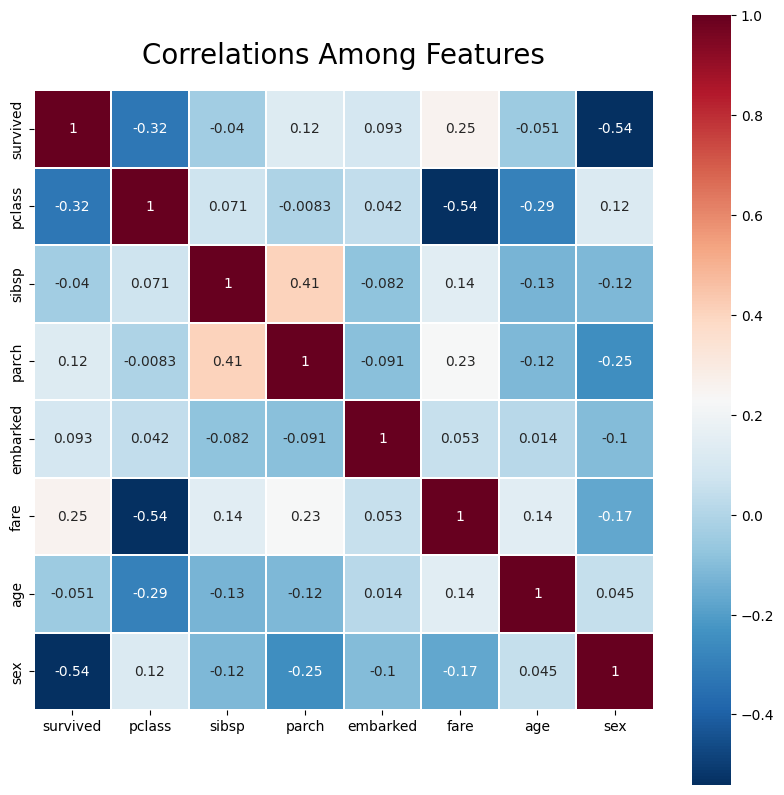

In [135]:
plt.subplots(figsize = (10,10))
data = train.loc[:,['survived','pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]
sns.heatmap(data.corr(),
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [136]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan label pada data pelatihan yang sudah dinormalisasi
features = train_scaled.drop('survived', axis=1)
labels = train_scaled['survived']

# Pisahkan data pelatihan menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Bangun model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada set pengujian
rf_predictions = rf_model.predict(X_test)

# Evaluasi model Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_mat = confusion_matrix(y_test, rf_predictions)
rf_classification_rep = classification_report(y_test, rf_predictions)

# Tampilkan hasil evaluasi
print("Random Forest Model Evaluation:")
print(f'Accuracy: {rf_accuracy}')
print(f'Confusion Matrix:\n{rf_confusion_mat}')
print(f'Classification Report:\n{rf_classification_rep}')

# Prediksi pada data uji menggunakan Random Forest
rf_test_predictions = rf_model.predict(test_scaled)

# Buat DataFrame untuk menyimpan hasil prediksi Random Forest
rf_result_df = pd.DataFrame({
    'ID': test['ID'],
    'Predicted': rf_test_predictions
})

# Export DataFrame ke file CSV
rf_result_df.to_csv('predicted_results_rf.csv', index=False)


Random Forest Model Evaluation:
Accuracy: 0.8076923076923077
Confusion Matrix:
[[104  13]
 [ 22  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       117
           1       0.77      0.66      0.71        65

    accuracy                           0.81       182
   macro avg       0.80      0.78      0.78       182
weighted avg       0.80      0.81      0.80       182



In [137]:
from sklearn.svm import SVC
features = train_scaled.drop('survived', axis=1)
labels = train_scaled['survived']
# Pisahkan data pelatihan menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Bangun model Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi pada set pengujian
svm_predictions = svm_model.predict(X_test)

# Evaluasi model SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_mat = confusion_matrix(y_test, svm_predictions)
svm_classification_rep = classification_report(y_test, svm_predictions)

# Tampilkan hasil evaluasi
print("SVM Model Evaluation:")
print(f'Accuracy: {svm_accuracy}')
print(f'Confusion Matrix:\n{svm_confusion_mat}')
print(f'Classification Report:\n{svm_classification_rep}')

# Prediksi pada data uji menggunakan SVM
svm_test_predictions = svm_model.predict(test_scaled)

# Buat DataFrame untuk menyimpan hasil prediksi SVM
svm_result_df = pd.DataFrame({
    'ID': test['ID'],
    'survived': svm_test_predictions
})

# Export DataFrame ke file CSV
svm_result_df.to_csv('predicted_results_svm.csv', index=False)

SVM Model Evaluation:
Accuracy: 0.8241758241758241
Confusion Matrix:
[[113   4]
 [ 28  37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       117
           1       0.90      0.57      0.70        65

    accuracy                           0.82       182
   macro avg       0.85      0.77      0.79       182
weighted avg       0.84      0.82      0.81       182



In [138]:
from sklearn.neighbors import KNeighborsClassifier

# Pisahkan data pelatihan menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Bangun model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediksi pada set pengujian
knn_predictions = knn_model.predict(X_test)

# Evaluasi model KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_mat = confusion_matrix(y_test, knn_predictions)
knn_classification_rep = classification_report(y_test, knn_predictions)

# Tampilkan hasil evaluasi
print("KNN Model Evaluation:")
print(f'Accuracy: {knn_accuracy}')
print(f'Confusion Matrix:\n{knn_confusion_mat}')
print(f'Classification Report:\n{knn_classification_rep}')

# Prediksi pada data uji menggunakan KNN
knn_test_predictions = knn_model.predict(test_scaled)

# Buat DataFrame untuk menyimpan hasil prediksi KNN
knn_result_df = pd.DataFrame({
    'ID': test['ID'],
    'survived': knn_test_predictions
})

# Export DataFrame ke file CSV
knn_result_df.to_csv('predicted_results_knn.csv', index=False)


KNN Model Evaluation:
Accuracy: 0.8076923076923077
Confusion Matrix:
[[101  16]
 [ 19  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       117
           1       0.74      0.71      0.72        65

    accuracy                           0.81       182
   macro avg       0.79      0.79      0.79       182
weighted avg       0.81      0.81      0.81       182

